Assignment 2 Codes

In [3]:
import os

import numpy as np
import pandas as pd
import sklearn.linear_model
import sklearn.metrics  # use existing libraries!

In [4]:
# score function: binary cross entropy loss
def score_yp(y, p): # y, p are numpy arrays
    return sklearn.metrics.log_loss(y, p)

In [5]:
# score wrapper, for data frames. we need this when using the `truth` data frame
def score(x, y): # x, y are data frames
    xy = pd.merge(x, y, on=["customer", "product", "week"])
    assert xy.shape[0] == x.shape[0]
    return score_yp(xy["y"].values, xy["probability"].values)

## Input

In [6]:
# INPUT
training_week = 88  # for model training
validation_week = 89  # for model and baseline validation
test_week = 90  # for the final prediction (one week in the future, beyond our data)
target_customers = list(range(2000))
target_products = list(range(250))

## Load data

In [7]:
baskets = pd.read_parquet(f"/Users/blue/Downloads/baskets-s.parquet")
# we only keep the 2000 customers required for the test set
# a complex model might require more data, e.g., see Boosted Tree model in Gabel & Timoshenko (2021)
baskets.head()

,week,customer,product,price
0,0,0,71,629
1,0,0,91,605
2,0,0,116,715
3,0,0,123,483
4,0,0,157,592


In [8]:
#check if there's missing data

In [9]:
baskets.isnull().values.any()

False

In [10]:
prediction_index = pd.read_parquet(f"/Users/blue/Downloads/prediction_index.parquet")
prediction_index.head()

,week,customer,product
0,90,0,0
1,90,0,1
2,90,0,2
3,90,0,3
4,90,0,4


In [11]:
coupon = pd.read_parquet(f"/Users/blue/Downloads/coupons-s.parquet")
coupon.head()

,week,customer,product,discount
0,0,0,35,35
1,0,0,193,40
2,0,0,27,30
3,0,0,177,35
4,0,0,5,30


In [12]:
coupon.isnull().values.any()

False

In [13]:
coupon

,week,customer,product,discount
0,0,0,35,35
1,0,0,193,40
2,0,0,27,30
3,0,0,177,35
4,0,0,5,30
...,...,...,...,...
44509995,89,1999,108,10
44509996,89,1999,207,25
44509997,89,1999,246,30
44509998,89,1999,51,15


In [14]:
#create a new basket dataset for calculate basket purchase with discount
baskets_wdiscounts = pd.read_parquet(f"/Users/blue/Downloads/baskets-s.parquet")
baskets_wdiscounts = baskets_wdiscounts.drop('price', axis=1)
baskets_wdiscounts

,week,customer,product
0,0,0,71
1,0,0,91
2,0,0,116
3,0,0,123
4,0,0,157
...,...,...,...
68091869,89,1999,144
68091870,89,1999,158
68091871,89,1999,192
68091872,89,1999,213


In [15]:
#drop discount role in coupon so to merge
coupon_wdiscounts = coupon.drop('discount', axis=1)
coupon_wdiscounts

,week,customer,product
0,0,0,35
1,0,0,193
2,0,0,27
3,0,0,177
4,0,0,5
...,...,...,...
44509995,89,1999,108
44509996,89,1999,207
44509997,89,1999,246
44509998,89,1999,51


In [16]:
baskets_wdiscounts= pd.merge(coupon_wdiscounts, baskets_wdiscounts, how='inner')

In [17]:
baskets_wdiscounts #purchase history with discount

,week,customer,product
0,0,5,221
1,0,7,61
2,0,8,74
3,0,9,194
4,0,11,245
...,...,...,...
54242,89,1989,228
54243,89,1991,75
54244,89,1994,148
54245,89,1994,46


In [18]:
#create another baskeet dataset for calculating interpurchase time
#diff refers to the interpurhcase time (weeks) compare to previous purchase

baskets_wdiff = pd.read_parquet(f"/Users/blue/Downloads/baskets-s.parquet")
baskets_wdiff = baskets_wdiff.drop('price', axis=1)
baskets_wdiff['diff'] = baskets_wdiff.groupby(['customer', 'product'])['week'].diff().fillna(0)
baskets_wdiff

,week,customer,product,diff
0,0,0,71,0.0
1,0,0,91,0.0
2,0,0,116,0.0
3,0,0,123,0.0
4,0,0,157,0.0
...,...,...,...,...
68091869,89,1999,144,1.0
68091870,89,1999,158,1.0
68091871,89,1999,192,1.0
68091872,89,1999,213,5.0


In [19]:
#validation of the created dataset

In [20]:
baskets_wdiff.loc[(baskets_wdiff['week'] == 3) & (baskets_wdiff['customer'] == 0)]

,week,customer,product,diff
2294602,3,0,71,1.0
2294603,3,0,91,1.0
2294604,3,0,123,3.0
2294605,3,0,130,1.0
2294606,3,0,179,0.0
2294607,3,0,184,1.0
2294608,3,0,214,0.0
2294609,3,0,225,2.0


In [ ]:
baskets_wdiff.loc[(baskets_wdiff['product'] == 71 ) & (baskets_wdiff['customer'] == 0)]

,week,customer,product,diff
0,0,0,71,0.0
764812,1,0,71,1.0
1530319,2,0,71,1.0
2294602,3,0,71,1.0
3824161,5,0,71,2.0
...,...,...,...,...
63488993,83,0,71,1.0
64253690,84,0,71,1.0
65018515,85,0,71,1.0
66547264,87,0,71,2.0


In [ ]:
baskets_wdiff.loc[(baskets_wdiff['week']== 5) & (baskets_wdiff['customer']== 0)]

,week,customer,product,diff
3824161,5,0,71,2.0
3824162,5,0,91,1.0
3824163,5,0,122,0.0
3824164,5,0,130,2.0
3824165,5,0,157,4.0
3824166,5,0,202,0.0
3824167,5,0,225,1.0
3824168,5,0,244,0.0




## Past purchase rate

In [23]:
# purchase frequency for one customer and product
(
    baskets[(baskets["customer"]==0) & (baskets["product"]==4)]
    .week.count()
    / n_weeks
)

0.08888888888888889

In [24]:

purchase_frequency_ij = (
    (
        baskets.groupby(["customer", "product"])
        [["week"]].count()
        / n_weeks
    )
    .rename(columns={"week": "probability"})
    .reset_index()
)
purchase_frequency_ij

,customer,product,probability
0,0,4,0.088889
1,0,11,0.100000
2,0,15,0.011111
3,0,16,0.044444
4,0,21,0.011111
...,...,...,...
142059,1999,237,0.044444
142060,1999,242,0.388889
142061,1999,243,0.011111
142062,1999,245,0.133333


<br>

## Baseline: Descriptive feature (past purchase rates) 

In [28]:
# function to define target variable for all customer-product combinations (in a given week)
def build_target(baskets, week):

    baskets_week = baskets[baskets["week"] == week][
        ["week", "customer", "product"]
    ].reset_index(drop=True)
    baskets_week["y"] = 1

    df = pd.DataFrame(
        {
            "week": week,
            "customer": np.repeat(target_customers, len(target_products), axis=0),
            "product": target_products * len(target_customers),
        }
    )

    df = df.merge(baskets_week, on=["week", "customer", "product"], how="left")
    df["y"] = df["y"].fillna(0).astype(int)

    return df

In [29]:
validation_week

89

In [30]:
baseline_target = build_target(baskets, validation_week)
baseline_target.head()

,week,customer,product,y
0,89,0,0,0
1,89,0,1,0
2,89,0,2,0
3,89,0,3,0
4,89,0,4,0


In [31]:
baseline_target.describe()

,week,customer,product,y
count,500000.0,500000.000000,500000.000000,500000.000000
mean,89.0,999.500000,124.500000,0.030386
std,0.0,577.350774,72.168278,0.171647
min,89.0,0.000000,0.000000,0.000000
25%,89.0,499.750000,62.000000,0.000000
50%,89.0,999.500000,124.500000,0.000000
75%,89.0,1499.250000,187.000000,0.000000
max,89.0,1999.000000,249.000000,1.000000


In [32]:
# the perfect prediction has a loss of 0
score_yp(baseline_target.y.values, baseline_target.y.values)

9.99200722162641e-16

In [33]:
# wrap code into function:
# baseline = purchase rates for customer-product combinations before the target week
def baseline_prediction(baskets, week):

    # subset baskets
    baskets_t = baskets[baskets["week"] < week].reset_index(drop=True)
    n_weeks = baskets_t.week.nunique()
    print(n_weeks)

    # model (non-0 probabilities)
    purchase_frequency_ij = (
        (baskets_t.groupby(["customer", "product"])[["week"]].count() / n_weeks)
        .rename(columns={"week": "probability"})
        .reset_index()
    )

    # filling in 0s
    df = pd.DataFrame(
        {
            "week": week,
            "customer": np.repeat(target_customers, len(target_products), axis=0),
            "product": target_products * len(target_customers),
        }
    )

    result_baseline = pd.merge(
        df,
        purchase_frequency_ij,
        on=["customer", "product"],
        how="left",
    ).fillna(0)

    return result_baseline

In [34]:
# prediction for validation data
baseline_validation = baseline_prediction(baskets, validation_week)
baseline_validation.head()

89


,week,customer,product,probability
0,89,0,0,0.000000
1,89,0,1,0.000000
2,89,0,2,0.000000
3,89,0,3,0.000000
4,89,0,4,0.089888


In [35]:
baseline_target

,week,customer,product,y
0,89,0,0,0
1,89,0,1,0
2,89,0,2,0
3,89,0,3,0
4,89,0,4,0
...,...,...,...,...
499995,89,1999,245,1
499996,89,1999,246,0
499997,89,1999,247,0
499998,89,1999,248,0


In [36]:
baseline_validation

,week,customer,product,probability
0,89,0,0,0.000000
1,89,0,1,0.000000
2,89,0,2,0.000000
3,89,0,3,0.000000
4,89,0,4,0.089888
...,...,...,...,...
499995,89,1999,245,0.123596
499996,89,1999,246,0.000000
499997,89,1999,247,0.000000
499998,89,1999,248,0.000000


In [37]:
# score for validation data
score(baseline_target, baseline_validation)

0.10034939532139737

<br>

## Our model: simple machine learning model  logistic regression

### constructing the features

In [41]:
def build_frequency_feature(baskets, week_start, week_end, feature_name):
    # subset baskets
    baskets_subset = baskets[
        (baskets["week"] >= week_start) & (baskets["week"] <= week_end)
    ]
    print(baskets_subset.week.nunique())

    purchase_frequency_ij = (
        (
            baskets_subset.groupby(["customer", "product"])[["week"]].count()
            / baskets_subset.week.nunique()
        )
        .rename(columns={"week": feature_name})
        .reset_index()
    )

    return purchase_frequency_ij

In [42]:
def build_coupon_offer_feature(coupon, week_start, week_end, feature_name):
    coupon_subset = coupon[
        (coupon["week"] >= week_start) & (coupon["week"] <= week_end)
    ]
    print(coupon_subset.week.nunique())
    
    coupon_offer_frequency_ij = (
        (
            coupon_subset.groupby(["customer", "product"])[["week"]].count()
        )
        .rename(columns={"week": feature_name})
        .reset_index()
    )

    return coupon_offer_frequency_ij

In [43]:
def build_coupon_used_feature(baskets_wdiscounts, week_start, week_end, feature_name):
    baskets_wdiscounts_subset = baskets_wdiscounts[
        (baskets_wdiscounts["week"] >= week_start) & (baskets_wdiscounts["week"] <= week_end)
    ]
    print(baskets_wdiscounts_subset.week.nunique())
    
    coupon_used_frequency_ij = (
        (
            baskets_wdiscounts_subset.groupby(["customer", "product"])[["week"]].count()
        )
        .rename(columns={"week": feature_name})
        .reset_index()
    )

    return coupon_used_frequency_ij

In [44]:
def build_price_feature(baskets, week_start, week_end, feature_name):
    baskets_subset = baskets[
        (baskets["week"] >= week_start) & (baskets["week"] <= week_end)
    ]
    print(baskets_subset.week.nunique())
    
    total_price_ij = (
        (
            baskets_subset.groupby(["customer", "product"])[["price"]].sum()
        )
        .rename(columns={"price": feature_name})
        .reset_index()
    )
    return total_price_ij

In [45]:
def build_avgprice_feature(baskets, week_start, week_end, feature_name):
    baskets_subset = baskets[
        (baskets["week"] >= week_start) & (baskets["week"] <= week_end)
    ]
    print(baskets_subset.week.nunique())
    
    avg_price_ij = (
        (
            baskets_subset.groupby(["customer", "product"])[["price"]].mean()
        #rescale the price by dividing by 100
        )
        .rename(columns={"price": feature_name})
        .reset_index()
    )
    return avg_price_ij

In [46]:
def build_interpurchasetime_feature(baskets, week_start, week_end, feature_name):
    baskets_wdiff_subset = baskets_wdiff[
        (baskets_wdiff["week"] >= week_start) & (baskets_wdiff["week"] <= week_end)
    ]
    print(baskets_wdiff_subset.week.nunique())
    
    median_interpurchasetime_ij = (
        (
            baskets_wdiff_subset.groupby(["customer", "product"])[["diff"]].median()
            
        )
        .rename(columns={"diff": feature_name})
        .reset_index()
    )
    return median_interpurchasetime_ij

In [47]:
#validation of the build interpurchase time function

In [48]:
test= build_interpurchasetime_feature( baskets, -1, training_week -1, "median of interpurchase time")
test

88


,customer,product,median of interpurchase time
0,0,4,4.5
1,0,11,6.0
2,0,15,0.0
3,0,16,5.0
4,0,21,0.0
...,...,...,...
141147,1999,237,22.5
141148,1999,242,2.0
141149,1999,243,0.0
141150,1999,245,4.0


In [49]:
test.loc[(test['product'] == 71  ) & (test['customer'] == 0)]

,customer,product,median of interpurchase time
13,0,71,1.0


In [50]:
build_avgprice_feature ( baskets, -1, training_week -1, "average money spent")

88


,customer,product,average money spent
0,0,4,620.00
1,0,11,611.00
2,0,15,620.00
3,0,16,644.00
4,0,21,463.00
...,...,...,...
141147,1999,237,466.00
141148,1999,242,508.80
141149,1999,243,490.00
141150,1999,245,539.00


In [51]:
build_price_feature ( baskets, -1, training_week -1, "total money spent")

88


,customer,product,total money spent
0,0,4,4960
1,0,11,5499
2,0,15,620
3,0,16,1932
4,0,21,463
...,...,...,...
141147,1999,237,1864
141148,1999,242,17808
141149,1999,243,490
141150,1999,245,5929


In [52]:
build_coupon_used_feature ( baskets_wdiscounts, -1, training_week -1 , "number of redeemed discouont")

88


,customer,product,number of redeemed discouont
0,0,16,1
1,0,67,3
2,0,71,2
3,0,87,2
4,0,91,2
...,...,...,...
39078,1999,224,1
39079,1999,228,2
39080,1999,242,1
39081,1999,245,2


In [53]:
build_coupon_offer_feature ( coupon, -1, training_week -1 , "number of discount offer")

88


,customer,product,number of discount offer
0,0,1,2
1,0,2,2
2,0,3,2
3,0,4,3
4,0,5,2
...,...,...,...
415338,1999,245,4
415339,1999,246,2
415340,1999,247,3
415341,1999,248,2


In [54]:
build_frequency_feature(baskets, -1, training_week - 1, "frequency_full")

88


,customer,product,frequency_full
0,0,4,0.090909
1,0,11,0.102273
2,0,15,0.011364
3,0,16,0.034091
4,0,21,0.011364
...,...,...,...
141147,1999,237,0.045455
141148,1999,242,0.397727
141149,1999,243,0.011364
141150,1999,245,0.125000


### building the base table

In [55]:
def build_base_table(baskets, week):
    # target variable (product purchase)
    # consider using multiple weeks for training! more data might lead to better results.
    # also, different weeks might have different information.
    y = build_target(baskets, week)
    # features
    # note how features are computed on data BEFORE the target week
    x_1 = build_frequency_feature(baskets, -1, week - 1, "frequency_full")
    x_2 = build_frequency_feature(baskets, week - 20, week - 1, "frequency_l20")
    x_3 = build_frequency_feature(baskets, week - 10, week - 1, "frequency_l10")
    x_4 = build_frequency_feature(baskets, week - 5, week - 1, "frequency_l5")
    x_5 = build_frequency_feature(baskets, week - 4, week - 1, "frequency_l4")
    x_6 = build_frequency_feature(baskets, week - 3, week - 1, "frequency_l3")
    x_7 = build_frequency_feature(baskets, week - 2, week - 1, "frequency_l2")
    x_8 = build_coupon_offer_feature (coupon, -1, week -1 , "number of discount offer")
    x_9 = build_coupon_used_feature ( baskets_wdiscounts, -1, week -1 , "number of redeemed discouont")
    x_10 = build_price_feature ( baskets, -1, week -1, "total money spent")
    x_11 = build_avgprice_feature (baskets, -1, week - 1, "average money spent")
    x_12 = build_interpurchasetime_feature(baskets, -1, week -1, "median of interpurchase time")
    base_table_yx = (
        y.merge(x_1, on=["customer", "product"], how="left")
        .merge(x_2, on=["customer", "product"], how="left")
        .merge(x_3, on=["customer", "product"], how="left")
        .merge(x_4, on=["customer", "product"], how="left")
        .merge(x_5, on=["customer", "product"], how="left")
        .merge(x_6, on=["customer", "product"], how="left")
        .merge(x_7, on=["customer", "product"], how="left")
        .merge(x_8, on=["customer", "product"], how="left")
        .merge(x_9, on=["customer", "product"], how="left")
        .merge(x_10, on=["customer", "product"], how="left")
        .merge(x_11, on=["customer", "product"], how="left")
        .merge(x_12, on=["customer", "product"], how="left")
        .fillna(0)
    )
    return base_table_yx

###### build_base_table(baskets, training_week)

### Training: Train model (week < 89)

In [163]:
training_week = 88 # for model training
validation_week = 89  # for model and baseline validatio

In [164]:
base_table_train = build_base_table(baskets, training_week)

88
20
10
5
4
3
2
88
88
88
88
88


In [58]:
base_table_train

,week,customer,product,y,frequency_full,frequency_l20,frequency_l10,frequency_l5,frequency_l4,frequency_l3,frequency_l2,number of discount offer,number of redeemed discouont,total money spent,average money spent,median of interpurchase time
0,88,0,0,0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
1,88,0,1,0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.00,0.0
2,88,0,2,0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.00,0.0
3,88,0,3,0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.00,0.0
4,88,0,4,0,0.090909,0.05,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4960.0,620.00,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,88,1999,245,0,0.125000,0.05,0.0,0.0,0.0,0.0,0.0,4.0,2.0,5929.0,539.00,4.0
499996,88,1999,246,0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.00,0.0
499997,88,1999,247,0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.00,0.0
499998,88,1999,248,0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.00,0.0


In [165]:
y = base_table_train["y"].values  # 1s and 0s

In [60]:
#full list of variablese
#"frequency_full", "frequency_l20", "frequency_l10", "frequency_l5", "frequency_l4",
#"frequency_l3", "frequency_l2", "number of discount offer", "number of redeemed discouont", 
#"average money spent","total money spent","median of interpurchase time"

In [166]:
X = base_table_train[[ "frequency_full", "frequency_l20","frequency_l10", "frequency_l5", 
                      "frequency_l4", "frequency_l3","frequency_l2",
                      "number of discount offer", "number of redeemed discouont" ,
                      "total money spent", "average money spent",
                      "median of interpurchase time"
                      ]].values  # purchase frequencies & discounts

## random search for hyperparameter

In [ ]:
from scipy.stats import loguniform
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
model = LogisticRegression()
cv= RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)


In [ ]:
space = dict()
space['solver']= ['newton-cg', 'lbfgs','liblinear']
space['penalty']= ['none','l1','l2','elasticnet']
space['C']= loguniform(1e-5,100)

In [ ]:
search = RandomizedSearchCV(model, space, n_iter=50, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)

In [ ]:
result= search.fit(X,y)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

/Users/blue/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/blue/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/blue/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/blue/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/blue/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/blue/opt/anaconda3/lib/python3.9/site-packages/skl

Best Score: 0.9716846666666668
Best Hyperparameters: {'C': 0.013653836035069424, 'penalty': 'l1', 'solver': 'liblinear'}


In [167]:
log_reg = sklearn.linear_model.LogisticRegression(max_iter= 500, C= 0.014, penalty= 'l1', solver='liblinear').fit(X, y)

In [168]:
log_reg.intercept_, log_reg.coef_

(array([-5.74721254]),
 array([[ 9.64719467e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00, -6.38459271e-02,
         -1.48802495e-01, -6.34719535e-02,  1.90008843e-01,
         -4.71014857e-05,  3.87511973e-03,  1.40631139e-02]]))

In [131]:
print(np.std(X,0) * log_reg.coef_)

[[ 0.89350291  0.          0.          0.          0.         -0.00784254
  -0.02041927 -0.08349484  0.07840914 -0.22580633  1.04192937  0.06376324]]


In [169]:
# use model to predict purchase probabilities 
base_table_train["probability"] = log_reg.predict_proba(X)[:, 1]

In [170]:
base_table_train

,week,customer,product,y,frequency_full,frequency_l20,frequency_l10,frequency_l5,frequency_l4,frequency_l3,frequency_l2,number of discount offer,number of redeemed discouont,total money spent,average money spent,median of interpurchase time,probability
0,88,0,0,0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.003182
1,88,0,1,0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.00,0.0,0.002803
2,88,0,2,0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.00,0.0,0.002803
3,88,0,3,0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.00,0.0,0.002803
4,88,0,4,0,0.090909,0.05,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4960.0,620.00,4.5,0.055810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,88,1999,245,0,0.125000,0.05,0.0,0.0,0.0,0.0,0.0,4.0,2.0,5929.0,539.00,4.0,0.072460
499996,88,1999,246,0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.00,0.0,0.002803
499997,88,1999,247,0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.00,0.0,0.002631
499998,88,1999,248,0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.00,0.0,0.002803


In [134]:
base_table_train.describe()

,week,customer,product,y,frequency_full,frequency_l20,frequency_l10,frequency_l5,frequency_l4,frequency_l3,frequency_l2,number of discount offer,number of redeemed discouont,total money spent,average money spent,median of interpurchase time,probability
count,500000.0,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,88.0,999.500000,124.500000,0.030654,0.030641,0.030606,0.030634,0.030648,0.030655,0.030752,0.030733,1.760000,0.106108,1575.630886,165.531328,1.605962,0.030796
std,0.0,577.350774,72.168278,0.172379,0.092854,0.096463,0.101532,0.111131,0.115689,0.123236,0.137237,1.314785,0.412429,4842.252146,269.028386,4.530072,0.092108
min,88.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001690
25%,88.0,499.750000,62.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.002806
50%,88.0,999.500000,124.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.002989
75%,88.0,1499.250000,187.000000,0.000000,0.011364,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,563.000000,470.400000,0.000000,0.024365
max,88.0,1999.000000,249.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,7.000000,69960.000000,837.000000,43.500000,0.983460


In [171]:
score_yp(
    base_table_train["y"].values,
    base_table_train["probability"].values,
)

0.08180587111863892

### Validation: Test model performance (week 89)

In [172]:
base_table_validation = build_base_table(baskets, validation_week)

89
20
10
5
4
3
2
89
89
89
89
89


In [173]:
X_validation = base_table_validation[["frequency_full", "frequency_l20","frequency_l10", "frequency_l5", 
                      "frequency_l4", "frequency_l3","frequency_l2",
                      "number of discount offer", "number of redeemed discouont",
                      "total money spent", "average money spent",
                      "median of interpurchase time"
                      ]
].values

In [174]:
base_table_validation["probability"] = log_reg.predict_proba(X_validation)[:, 1]

In [140]:
base_table_validation

,week,customer,product,y,frequency_full,frequency_l20,frequency_l10,frequency_l5,frequency_l4,frequency_l3,frequency_l2,number of discount offer,number of redeemed discouont,total money spent,average money spent,median of interpurchase time,probability
0,89,0,0,0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.003185
1,89,0,1,0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.00,0.0,0.002806
2,89,0,2,0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.00,0.0,0.002634
3,89,0,3,0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.00,0.0,0.002806
4,89,0,4,0,0.089888,0.05,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4960.0,620.00,4.5,0.055282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,89,1999,245,1,0.123596,0.05,0.0,0.0,0.0,0.0,0.0,4.0,2.0,5929.0,539.00,4.0,0.071539
499996,89,1999,246,0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.00,0.0,0.002806
499997,89,1999,247,0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.00,0.0,0.002634
499998,89,1999,248,0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.00,0.0,0.002806


In [175]:
base_table_validation.describe()

,week,customer,product,y,frequency_full,frequency_l20,frequency_l10,frequency_l5,frequency_l4,frequency_l3,frequency_l2,number of discount offer,number of redeemed discouont,total money spent,average money spent,median of interpurchase time,probability
count,500000.0,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,89.0,999.500000,124.500000,0.030386,0.030641,0.030634,0.030644,0.030654,0.030728,0.030707,0.030758,1.780000,0.107302,1593.536158,166.093219,1.625532,0.030716
std,0.0,577.350774,72.168278,0.171647,0.092838,0.096484,0.101480,0.110980,0.115722,0.123248,0.136901,1.322528,0.415640,4896.362446,269.311752,4.581551,0.091715
min,89.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001689
25%,89.0,499.750000,62.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.002803
50%,89.0,999.500000,124.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.002986
75%,89.0,1499.250000,187.000000,0.000000,0.011236,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,569.000000,471.000000,0.000000,0.024485
max,89.0,1999.000000,249.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,7.000000,70755.000000,837.000000,44.000000,0.982956


In [176]:
score_yp(
    base_table_validation["y"].values,
    base_table_validation["probability"].values,
)

0.08126668037869274

### for loop for cross-validation

For Loop for both training + validation

"frequency_full", "frequency_l20","frequency_l10", "frequency_l5", 
                      "frequency_l4", "frequency_l3","frequency_l2", "number of discount offer", "number of redeemed discouont",
                      "total money spent","average money spent", "median of interpurchase time"
                    

In [ ]:
for n in range(29,89):
    training_week = n  # for model training
    validation_week = n+1  # for model and baseline validation

    base_table_train = build_base_table(baskets, training_week)
    y = base_table_train["y"].values  # 1s and 0s
    X = base_table_train[[ "frequency_full", "frequency_l20", "frequency_l10", 
                      "frequency_l5", "frequency_l4","frequency_l3","frequency_l2", "number of discount offer",
                      "number of redeemed discouont", "total money spent ",
                      "average money spent", "median of interpurchase time"
                      ]].values
    log_reg = sklearn.linear_model.LogisticRegression(max_iter= 500, C= 0.014, penalty= 'l1', solver='liblinear').fit(X, y)
    log_reg.intercept_, log_reg.coef_
    base_table_train["probability"] = log_reg.predict_proba(X)[:, 1]

    #validation
    base_table_validation = build_base_table(baskets, validation_week)
    X_validation = base_table_validation[[
                    "frequency_full", "frequency_l20", "frequency_l10", 
                      "frequency_l5", "frequency_l4","frequency_l3","frequency_l2", "number of discount offer",
                      "number of redeemed discouont", "total money spent"
                      "average money spent", "median of interpurchase time"
                      ]].values
    base_table_validation["probability"] = log_reg.predict_proba(X_validation)[:, 1]
    print (score_yp(
    base_table_validation["y"].values,
    base_table_validation["probability"].values,))
    


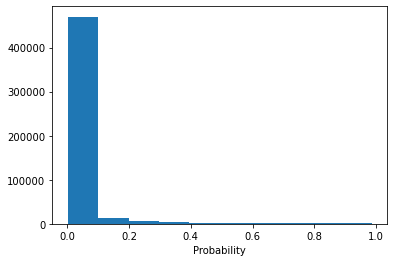

In [ ]:
import matplotlib.pyplot as plt

plt.hist(base_table_validation["probability"])
plt.xlabel("Probability")
plt.show()

### Test: Produce final result for submission (week 90)

We can't evaluate this prediction because we don't have this data -- that's why we need the validation set! 

In [177]:
base_table_test = build_base_table(baskets, test_week)

90
20
10
5
4
3
2
90
90
90
90
90


In [178]:
X_test = base_table_test[["frequency_full", "frequency_l20","frequency_l10", "frequency_l5", 
                      "frequency_l4", "frequency_l3","frequency_l2", "number of discount offer", "number of redeemed discouont",
                      "total money spent","average money spent", "median of interpurchase time"]].values

In [179]:
base_table_test["probability"] = log_reg.predict_proba(X_test)[:, 1]

In [180]:
base_table_test

,week,customer,product,y,frequency_full,frequency_l20,frequency_l10,frequency_l5,frequency_l4,frequency_l3,frequency_l2,number of discount offer,number of redeemed discouont,total money spent,average money spent,median of interpurchase time,probability
0,90,0,0,0,0.000000,0.00,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.003182
1,90,0,1,0,0.000000,0.00,0.0,0.0,0.00,0.000000,0.0,2.0,0.0,0.0,0.000000,0.0,0.002803
2,90,0,2,0,0.000000,0.00,0.0,0.0,0.00,0.000000,0.0,3.0,0.0,0.0,0.000000,0.0,0.002631
3,90,0,3,0,0.000000,0.00,0.0,0.0,0.00,0.000000,0.0,2.0,0.0,0.0,0.000000,0.0,0.002803
4,90,0,4,0,0.088889,0.05,0.0,0.0,0.00,0.000000,0.0,3.0,0.0,4960.0,620.000000,4.5,0.054792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,90,1999,245,0,0.133333,0.10,0.1,0.2,0.25,0.333333,0.5,4.0,2.0,6478.0,539.833333,4.5,0.070411
499996,90,1999,246,0,0.000000,0.00,0.0,0.0,0.00,0.000000,0.0,3.0,0.0,0.0,0.000000,0.0,0.002631
499997,90,1999,247,0,0.000000,0.00,0.0,0.0,0.00,0.000000,0.0,3.0,0.0,0.0,0.000000,0.0,0.002631
499998,90,1999,248,0,0.000000,0.00,0.0,0.0,0.00,0.000000,0.0,2.0,0.0,0.0,0.000000,0.0,0.002803


In [182]:
final_prediction = base_table_test[['week','customer', 'product','probability']]

In [183]:
final_prediction

,week,customer,product,probability
0,90,0,0,0.003182
1,90,0,1,0.002803
2,90,0,2,0.002631
3,90,0,3,0.002803
4,90,0,4,0.054792
...,...,...,...,...
499995,90,1999,245,0.070411
499996,90,1999,246,0.002631
499997,90,1999,247,0.002631
499998,90,1999,248,0.002803


In [184]:
final_prediction.describe()

,week,customer,product,probability
count,500000.0,500000.000000,500000.000000,500000.000000
mean,90.0,999.500000,124.500000,0.030635
std,0.0,577.350774,72.168278,0.091340
min,90.0,0.000000,0.000000,0.001689
25%,90.0,499.750000,62.000000,0.002803
50%,90.0,999.500000,124.500000,0.002986
75%,90.0,1499.250000,187.000000,0.024547
max,90.0,1999.000000,249.000000,0.982469


In [187]:
final_prediction.to_csv(r'/Users/blue/Downloads/final_prediction.csv')

In [186]:
baskets.loc[(baskets['week'] == 8) & (baskets_wdiff['customer'] == 0)]

,week,customer,product,price
6118458,8,0,38,699
6118459,8,0,71,629
6118460,8,0,123,483
6118461,8,0,130,613
6118462,8,0,167,582
6118463,8,0,171,639
6118464,8,0,184,651
6118465,8,0,224,712
6118466,8,0,244,694
